Universidad Simón Bolívar. \\
Departamento de Cómputo Científico. \\
CO-6612, Introducción a Redes Neuronales. \\
TDD 2020. \\
Prof. Minaya Villasana. \\
Amin Arriaga 16-10072. 
# **Tarea 3: El Adaline**

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from random import uniform, shuffle
from math import e

In [ ]:
# Montamos el drive para obtener los archivos 
# mnist_test.csv,   mnist_train.csv  y   datosT3.csv
from google.colab import drive
drive.mount('/content/drive')

## **Problema 1**
Programe el Adaline usando el algoritmo del LMS. Usted deberá entregar su código documentado.

In [ ]:
def E(X: [[float]], Y: [[float]], W: [[float]]):
  """ Calcula el error cuadratico medio promediado.

  Input:
   - X = [x_i]:   Conjunto de datos de entrenamiento, cada x_i debe ser un arreglo.
   - Y = [y_i]:   Conjunto de respuesta, cada y_i debe ser un arreglo con la
                  correcta del dato x_i.
   - W:  Matriz con los pesos.

  Output:
   ecm:  Error cuadratico medio.
  """

  # Numero de datos
  N = len(X)
  # Error cuadratico medio.
  ecm = 0

  for j in range(N):
      # Obtenemos el j-esimo dato.
      x_j = X[j].copy()
      # Agregamos una coordenada para el sesgo.
      x_j = np.append(x_j, 1)
      # Calculamos el resultado de la red.
      y_j = np.dot(W, x_j)
      # Obtenemos el resultado correcto.
      d_j = Y[j]

      # Sumamos el error
      ecm += np.dot(d_j-y_j, d_j-y_j)

  return ecm/(2*N)


def adeline(X, Y, n, epochs, ecm_min=0):
  """ Implementacion del adeline multiple.
  
  Input:
   - X = [x_i]   Conjunto de datos de entrenamiento, cada x_i debe ser un arreglo.
   - Y = [y_i]   Conjunto de respuesta, cada y_i debe ser un arreglo con la
                  correcta del dato x_i.
   - n   Tasa de aprendizaje.
   - epochs    Numero de epocas.
   - ecm_min:   Error cuadratico medio necesario para finalizar el entrenamiento
                  antes de finalizar las epocas. Valor predeterminado: 0.

  Output:
   W:  Matriz con los pesos.
   ecm:  Error cuadratico medio obtenido en cada epoca.
  """

  # Obtenemos la dimension de los datos de entrada y salida.
  N_x = len(X[0])
  N_y = len(Y[0])
  # Obtenemos el numero de datos.
  N = len(X)
  # Inicializamos los pesos sinapticos.
  W = np.array([[uniform(-0.05,0.05) for i in range(N_x + 1)] for j in range(N_y)])
  # Error cuadratico medio obtenido en cada epoca.
  ecm = []
  # Aqui almacenaremos los indices de los datos.
  indexes = [i for i in range(N)]

  for i in range(epochs):
      # Ordenamos aleatoriamente los indices.
      shuffle(indexes)
    
      for j in indexes:
          # Obtenemos el j-esimo dato.
          x_j = X[j].copy()
          # Agregamos una coordenada para el sesgo.
          x_j = np.append(x_j, 1)
          # Calculamos el resultado de la red.
          y_j = np.dot(W, x_j)
          # Obtenemos el resultado correcto.
          d_j = Y[j]
          # Actualizamos W.
          W += n*np.outer((d_j - y_j),x_j)

      new_ecm = E(X, Y, W)
      ecm.append(new_ecm)
      print("Epoca: ", i+1, ". Error cuadratico medio: ", new_ecm)

      if new_ecm <= ecm_min:
        break

  return W, ecm

In [ ]:
# Definimos las siguientes funciones para probar la implementacion del adeline.
def d(X: [[float]]):
  """ Input: X = [x, y, z] 
    Output: [2x - 10y + 6z - 4]
  """
  return np.array([2*X[0] - 10*X[1] + 6*X[2] - 4])


def genData(N):
  """ Generamos un conjunto de datos aleatorios de 3 dimensiones.

  Input: 
    N:    Numero de datos.
  Output
    Arreglo con N arreglos de 3 coordenadas entre los valores -10 y 10.
  """
  N = 100
  X = []
  Y = []
  for i in range(N):
    data = np.array([uniform(-10, 10), uniform(-10, 10), uniform(-10, 10)])
    X.append(data)
    Y.append(d(data))
  X = np.array(X)
  Y = np.array(Y)

  return X, Y

In [ ]:
# Probamos la implementacion del adeline.
X, Y = genData(100)
W, ecm = adeline(X, Y, 0.01, 100, ecm_min=0)
print("Pesos obtenidos: ")
print(W)

Epoca:  1 . Error cuadratico medio:  1.3005873984477176
Epoca:  2 . Error cuadratico medio:  0.13517906974272098
Epoca:  3 . Error cuadratico medio:  0.12743518390764258
Epoca:  4 . Error cuadratico medio:  0.0012040755272192491
Epoca:  5 . Error cuadratico medio:  8.975090859827665e-05
Epoca:  6 . Error cuadratico medio:  1.3020232861696994e-05
Epoca:  7 . Error cuadratico medio:  2.2288699916158807e-06
Epoca:  8 . Error cuadratico medio:  5.79056810333302e-07
Epoca:  9 . Error cuadratico medio:  3.1304001906672223e-08
Epoca:  10 . Error cuadratico medio:  5.583560213093177e-09
Epoca:  11 . Error cuadratico medio:  3.2699870576160016e-10
Epoca:  12 . Error cuadratico medio:  1.1502230307296618e-10
Epoca:  13 . Error cuadratico medio:  8.300215016387171e-12
Epoca:  14 . Error cuadratico medio:  5.384461679185566e-13
Epoca:  15 . Error cuadratico medio:  5.878572844194196e-14
Epoca:  16 . Error cuadratico medio:  1.616722378585096e-14
Epoca:  17 . Error cuadratico medio:  7.203337827985

In [ ]:
X, Y = genData(100)
error = E(X, Y, W)
print("El error cuadratico medio promediado para los datos de prueba es: ", error)

El error cuadratico medio promediado para los datos de prueba es:  4.891173974819e-26


## **Problema 2**
Para el conjunto de entrenamiento usado en la tarea del perceptrón, repita la experiencia pero ahora con el Adaline. Evalúe y compare este algoritmo con los resultados obtenidos en la tarea anterior. Comente sobre su escogencia en los parámetros de aprendizaje.

In [ ]:
def digitToCanon(x: int):
  """ Dado un digito, retorna un vector de ceros excepto en la posicion del 
  digito, donde habra un 1. """
  r = [0]*10
  r[x] = 1
  return np.array(r)

def readCSV(file: str):
  """ Leer datos .csv para el problema de los digitos, donde para cada dato
  la primera coordenada indica la respuesta, y las demas coordenadas seran 
  divididas entre 255 para que esten en el rango [0, 1]. 

  Input: 
    file:   Nombre del archivo csv.
  Output:
    X: Conjunto de imagenes de los digitos
    Y: Respuesta a cada dato en X.
  """
  with open(file, newline='') as File:  
      reader = csv.reader(File)
      X = []
      Y = []
      for r in reader:
          for i in range(1, len(r)):
              r[i] = float(r[i])/255
          X.append(r)
          Y.append(digitToCanon(int(r.pop(0))))
          
  return np.array(X), np.array(Y)

# Obtenemos los datos de los digitos.
X_train, Y_train = readCSV("/content/drive/My Drive/mnist_train.csv")
X_test, Y_test = readCSV("/content/drive/My Drive/mnist_test.csv")

Usaremos una implementación ligeramente distinta a la anterior para poder calcular la precisión en cada época y poder compararla con la precisión obtenida con el perceptrón. En este caso, se usará la estrategia del aprendizaje por reforzamiento para obtener la precisión, donde cada elemento de la salida $y(n)$ sera 1 si es el máximo o 0 en caso contrario.

In [ ]:
def E_mnist(X, Y, W):
  """ Calcula el error cuadratico medio promediado y la precision de la RNA con
  los datos de MNIST de los digitos.
  
  Input:
   - X = [x_i]   Conjunto de datos de entrenamiento, cada x_i debe ser un arreglo.
   - Y = [y_i]   Conjunto de respuesta, cada y_i debe ser un arreglo con la
                  correcta del dato x_i.
   - W:  Matriz con los pesos.

  Output:
   ecm:  Error cuadratico medio.
   acc:  Precision
  """

  # Numero de datos
  N = len(X)
  # Error cuadratico medio.
  ecm = 0
  # Numero de errores.
  errors = 0

  for j in range(N):
      # Obtenemos el j-esimo dato.
      x_j = X[j].copy()
      # Agregamos una coordenada para el sesgo.
      x_j = np.append(x_j, 1)
      # Calculamos el resultado de la red.
      y_j = np.dot(W, x_j)
      # Obtenemos el resultado correcto.
      d_j = Y[j]

      # Sumamos el error
      ecm += np.dot(d_j-y_j, d_j-y_j)
      # Si hubo algun resultado erroneo.
      if any(int(y_j[k]/max(y_j)) != d_j[k] for k in range(len(y_j))):
          errors += 1

  return ecm/(2*N), (N-errors)/N


def adeline_mnist(X, Y, n, epochs, ecm_min=0):
  """ Implementacion del adeline multiple para los datos de MNIST de los digitos.
  
  Input:
   - X = [x_i]   Conjunto de datos de entrenamiento, cada x_i debe ser un arreglo.
   - Y = [y_i]   Conjunto de respuesta, cada y_i debe ser un arreglo con la
                  correcta del dato x_i.
   - n   Tasa de aprendizaje.
   - epochs    Numero de epocas.
   - phi    Funcion de activacion.
   - ecm_min:   Error cuadratico medio necesario para finalizar el entrenamiento
                  antes de finalizar las epocas. Valor predeterminado: 0.

  Output:
   W:  Matriz con los pesos.
   ecm:  Error cuadratico medio promediado obtenido en cada epoca.
   acc:  Precision obtenida en cada epoca.
  """

  # Obtenemos la dimension de los datos de entrada y salida.
  N_x = len(X[0])
  N_y = len(Y[0])
  # Obtenemos el numero de datos.
  N = len(X)
  # Inicializamos los pesos sinapticos.
  W = np.array([[uniform(-0.05,0.05) for i in range(N_x + 1)] for j in range(N_y)])
  # Error cuadratico medio obtenido en cada epoca.
  ecm = []
  # Precision obtenida en cada epoca
  acc = []
  # Aqui almacenaremos los indices de los datos.
  indexes = [i for i in range(N)]

  for i in range(epochs):
      # Ordenamos aleatoriamente los indices.
      shuffle(indexes)
    
      for j in indexes:
          # Obtenemos el j-esimo dato.
          x_j = X[j].copy()
          # Agregamos una coordenada para el sesgo.
          x_j = np.append(x_j, 1)
          # Calculamos el resultado de la red.
          y_j = np.dot(W, x_j)
          # Obtenemos el resultado correcto.
          d_j = Y[j]
          # Actualizamos W.
          W += n*np.outer((d_j - y_j),x_j)

      new_ecm, new_acc = E_mnist(X, Y, W)
      ecm.append(new_ecm)
      acc.append(new_acc)
      print("Epoca: ", i+1, ". Error cuadratico medio promediado: ", new_ecm, ". Precision: ", new_acc)

      if new_ecm <= ecm_min:
        break

  return W, ecm, acc

In [ ]:
def problema_2(eta: float, acc_perceptron: [float]):
  W, ecm, acc = adeline_mnist(X_train, Y_train, eta, 50)
  epochs = [i for i in range(1, 51)]
  plt.plot(epochs, acc, label="Adeline")
  plt.plot(epochs, acc_perceptron, label="Perceptron")
  plt.xlabel("Epoca")
  plt.ylabel("Precison")
  plt.title("Evolucion del entrenamiento para eta = " + str(eta))
  plt.legend()
  plt.show()

  print("Precision maxima obtenida: ", max(acc))
  M = len(X_test)
  ecm, acc = E_mnist(X_test, Y_test, W)
  print("Con los datos de prueba se obtuvo una precision de ", acc)

Epoca:  1 . Error cuadratico medio promediado:  0.20472201101894902 . Precision:  0.8438166666666667
Epoca:  2 . Error cuadratico medio promediado:  0.20602185320445524 . Precision:  0.8338666666666666
Epoca:  3 . Error cuadratico medio promediado:  0.19967784205392114 . Precision:  0.8549833333333333
Epoca:  4 . Error cuadratico medio promediado:  0.2041181225923476 . Precision:  0.8418
Epoca:  5 . Error cuadratico medio promediado:  0.20075216111500904 . Precision:  0.8442333333333333
Epoca:  6 . Error cuadratico medio promediado:  0.2030016971420965 . Precision:  0.8464333333333334
Epoca:  7 . Error cuadratico medio promediado:  0.20089085577748708 . Precision:  0.8392166666666667
Epoca:  8 . Error cuadratico medio promediado:  0.1972522341992256 . Precision:  0.8492333333333333
Epoca:  9 . Error cuadratico medio promediado:  0.20258352297158996 . Precision:  0.8368833333333333
Epoca:  10 . Error cuadratico medio promediado:  0.20006872660950112 . Precision:  0.8447
Epoca:  11 . Err

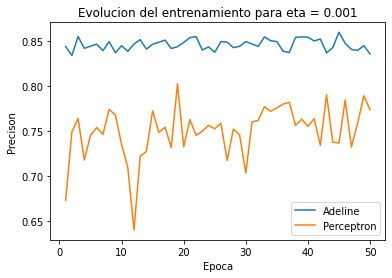

Precision maxima obtenida:  0.8597
Con los datos de prueba se obtuvo una precision de  0.8429


In [ ]:
acc_perceptron = [0.6729,0.749,0.7638,0.7177,0.7452,0.7538,0.7461,0.774,0.7678,0.735,
                  0.7096,0.64,0.7218,0.7273,0.7724,0.7484,0.7541,0.7317,0.8024,0.7324,
                  0.7626,0.745,0.7498,0.7562,0.7524,0.7585,0.7172,0.752,0.7456,0.7031,
                  0.76,0.7617,0.7769,0.7718,0.7757,0.7798,0.7819,0.756,0.7631,0.755,
                  0.7637,0.734,0.7901,0.7375,0.7366,0.7843,0.7322,0.7584,0.7891,0.7736]
problema_2(0.001, acc_perceptron)

Epoca:  1 . Error cuadratico medio promediado:  0.43538858105483424 . Precision:  0.6046333333333334
Epoca:  2 . Error cuadratico medio promediado:  0.38664167052603443 . Precision:  0.6777166666666666
Epoca:  3 . Error cuadratico medio promediado:  0.3788573820791902 . Precision:  0.6601166666666667
Epoca:  4 . Error cuadratico medio promediado:  0.34574353520216844 . Precision:  0.7182666666666667
Epoca:  5 . Error cuadratico medio promediado:  0.3316661248002955 . Precision:  0.71305
Epoca:  6 . Error cuadratico medio promediado:  0.33228099840141284 . Precision:  0.73085
Epoca:  7 . Error cuadratico medio promediado:  0.37624254110671457 . Precision:  0.7070333333333333
Epoca:  8 . Error cuadratico medio promediado:  0.33194014866684274 . Precision:  0.7379833333333333
Epoca:  9 . Error cuadratico medio promediado:  0.30047843706850363 . Precision:  0.7705666666666666
Epoca:  10 . Error cuadratico medio promediado:  0.3664710512075657 . Precision:  0.6816833333333333
Epoca:  11 . E

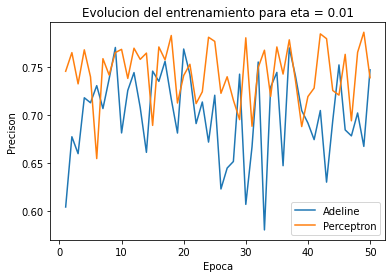

Precision maxima obtenida:  0.7705666666666666
Con los datos de prueba se obtuvo una precision de  0.7485


In [ ]:
acc_perceptron = [0.7458,0.7652,0.7327,0.7681,0.7399,0.655,0.7589,0.7419,0.7653,
                  0.7686,0.7384,0.7698,0.7582,0.7647,0.6895,0.7711,0.7577,0.783,
                  0.7128,0.7414,0.7531,0.7122,0.7245,0.7812,0.7769,0.7229,0.7401,
                  0.7158,0.6955,0.7806,0.6886,0.7498,0.7677,0.7196,0.7711,0.7429,
                  0.7785,0.7361,0.6883,0.7195,0.7283,0.7847,0.7797,0.7258,0.721,
                  0.7634,0.6943,0.7655,0.7864,0.7391]
problema_2(0.01, acc_perceptron)

In [ ]:
acc_perceptron = [0.7163,0.7592,0.7501,0.7246,0.7351,0.7655,0.7745,0.7064,0.7438,
                  0.7475,0.7722,0.7015,0.7644,0.7622,0.7589,0.7682,0.7353,0.6886,
                  0.7022,0.7654,0.7612,0.7701,0.7635,0.7242,0.7819,0.7093,0.7786,
                  0.753,0.7488,0.7326,0.7473,0.7445,0.7724,0.777,0.6981,0.7189,
                  0.7785,0.7728,0.76,0.7774,0.7647,0.7529,0.7514,0.7755,0.758,0.7672,
                  0.7372,0.7315,0.7088,0.7845]
problema_2(0.1, acc_perceptron)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:906: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


ValueError: ignored

Podemos notar cláramente las diferencias en los resultados obtenidos para cada $\eta$. Con $\eta = 0.001$ obtuvimos una precisión aceptable, rondando los 0.85, muy por encima del perceptrón. Sin embargo, para $\eta=0.01$ la red se vuelve muy inestable, y su rendimiento es superado por el perceptrón. Finalmente para $\eta = 0.1$ obtenemos un error, el cual ocurre porque el valor de una de las neuronas de salida da **NaN**, lo cual significa que no hubo una convergencia en los valores output, alcanzando el límite de los números que python puede representar. Esto ocurre debido a que la función lineal, siendo la función de activación del adeline, no está acotada, por lo tanto, el error tampoco, asi que la actualización de los pesos puede ocurrir de manera brusca, haciendo oscilar los datos de salida en valores cada vez de mayor magnitud y finalmente ocasionando un error. Además, como la etiqueta de cada patrón es 0 o 1 en cada adeline, la función lineal no es la más indicada para el output de cada neurona, lo cual contribuye a la no-convergencia de la red. También cabe destacar que usar más épocas no parece ser efectivo, pues no se aprecia una curva de aprendizaje creciente para ningún $\eta$.

Debido a todo esto, se decidió experimentar un poco y usar la función logística para limitar la salida de cada neurona al rango $(0, 1)$. Veremos el cambio que esto produce solo para $\eta = 0.001$, el cual nos dio el mejor rendimiento con los adelines.

In [ ]:
def logist(x: float, alpha: float = 1):
  """ Funcion logistica  F(x) -> 1/(1 + exp(-x)) """
  return 1/(1+e**(-alpha*x))


def E_mnist(X, Y, W, phi):
  """ Calcula el error cuadratico medio promediado y la precision de la RNA con
  los datos de MNIST de los digitos.
  
  Input:
   - X = [x_i]   Conjunto de datos de entrenamiento, cada x_i debe ser un arreglo.
   - Y = [y_i]   Conjunto de respuesta, cada y_i debe ser un arreglo con la
                  correcta del dato x_i.
   - W:  Matriz con los pesos.
   - phi    Funcion de activacion.

  Output:
   ecm:  Error cuadratico medio.
   acc:  Precision
  """

  # Numero de datos
  N = len(X)
  # Error cuadratico medio.
  ecm = 0
  # Numero de errores.
  errors = 0

  for j in range(N):
      # Obtenemos el j-esimo dato.
      x_j = X[j].copy()
      # Agregamos una coordenada para el sesgo.
      x_j = np.append(x_j, 1)
      # Calculamos el resultado de la red.
      A = np.dot(W, x_j)
      y_j = [phi(A[k]) for k in range(len(A))]
      # Obtenemos el resultado correcto.
      d_j = Y[j]

      # Sumamos el error
      ecm += np.dot(d_j-y_j, d_j-y_j)
      # Si hubo algun resultado erroneo.
      if any(int(y_j[k]/max(y_j)) != d_j[k] for k in range(len(y_j))):
          errors += 1

  return ecm/(2*N), (N-errors)/N


def adeline_mnist(X, Y, n, epochs, phi, ecm_min=0):
  """ Implementacion del adeline multiple para los datos de MNIST de los digitos.
  
  Input:
   - X = [x_i]   Conjunto de datos de entrenamiento, cada x_i debe ser un arreglo.
   - Y = [y_i]   Conjunto de respuesta, cada y_i debe ser un arreglo con la
                  correcta del dato x_i.
   - n   Tasa de aprendizaje.
   - epochs    Numero de epocas.
   - phi    Funcion de activacion.
   - ecm_min:   Error cuadratico medio necesario para finalizar el entrenamiento
                  antes de finalizar las epocas. Valor predeterminado: 0.

  Output:
   W:  Matriz con los pesos.
   ecm:  Error cuadratico medio promediado obtenido en cada epoca.
   acc:  Precision obtenida en cada epoca.
  """

  # Obtenemos la dimension de los datos de entrada y salida.
  N_x = len(X[0])
  N_y = len(Y[0])
  # Obtenemos el numero de datos.
  N = len(X)
  # Inicializamos los pesos sinapticos.
  W = np.array([[uniform(-0.05,0.05) for i in range(N_x + 1)] for j in range(N_y)])
  # Error cuadratico medio obtenido en cada epoca.
  ecm = []
  # Precision obtenida en cada epoca
  acc = []
  # Aqui almacenaremos los indices de los datos.
  indexes = [i for i in range(N)]

  for i in range(epochs):
      # Ordenamos aleatoriamente los indices.
      shuffle(indexes)
    
      for j in indexes:
          # Obtenemos el j-esimo dato.
          x_j = X[j].copy()
          # Agregamos una coordenada para el sesgo.
          x_j = np.append(x_j, 1)
          # Calculamos el resultado de la red.
          A = np.dot(W, x_j)
          y_j = [phi(A[k]) for k in range(len(A))]
          # Obtenemos el resultado correcto.
          d_j = Y[j]
          # Actualizamos W.
          W += n*np.outer((d_j - y_j),x_j)

      new_ecm, new_acc = E_mnist(X, Y, W, phi)
      ecm.append(new_ecm)
      acc.append(new_acc)
      print("Epoca: ", i+1, ". Error cuadratico medio promediado: ", new_ecm, ". Precision: ", new_acc)

      if new_ecm <= ecm_min:
        break

  return W, ecm, acc

Epoca:  1 . Error cuadratico medio promediado:  0.11594869755244946 . Precision:  0.8847
Epoca:  2 . Error cuadratico medio promediado:  0.10355446419865652 . Precision:  0.8963
Epoca:  3 . Error cuadratico medio promediado:  0.09811808732155329 . Precision:  0.9006
Epoca:  4 . Error cuadratico medio promediado:  0.0947019164200996 . Precision:  0.9029833333333334
Epoca:  5 . Error cuadratico medio promediado:  0.09258101717939941 . Precision:  0.9054333333333333
Epoca:  6 . Error cuadratico medio promediado:  0.09058971585824657 . Precision:  0.9078166666666667
Epoca:  7 . Error cuadratico medio promediado:  0.08900280600734933 . Precision:  0.9096666666666666
Epoca:  8 . Error cuadratico medio promediado:  0.08807114434767052 . Precision:  0.9108166666666667
Epoca:  9 . Error cuadratico medio promediado:  0.08718941801300603 . Precision:  0.91155
Epoca:  10 . Error cuadratico medio promediado:  0.08632632305382373 . Precision:  0.912
Epoca:  11 . Error cuadratico medio promediado:  0

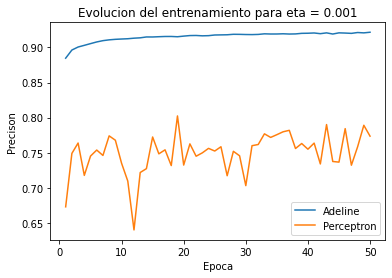

Precision maxima obtenida:  0.92165
Con los datos de prueba se obtuvo una precision de  0.9187


In [ ]:
eta = 0.001
W, ecm, acc = adeline_mnist(X_train, Y_train, eta, 50, logist)
epochs = [i for i in range(1, 51)]
acc_perceptron = [0.6729,0.749,0.7638,0.7177,0.7452,0.7538,0.7461,0.774,0.7678,
                  0.735,0.7096,0.64,0.7218,0.7273,0.7724,0.7484,0.7541,0.7317,
                  0.8024,0.7324,0.7626,0.745,0.7498,0.7562,0.7524,0.7585,0.7172,
                  0.752,0.7456,0.7031,0.76,0.7617,0.7769,0.7718,0.7757,0.7798,
                  0.7819,0.756,0.7631,0.755,0.7637,0.734,0.7901,0.7375,0.7366,
                  0.7843,0.7322,0.7584,0.7891,0.7736]
plt.plot(epochs, acc, label="Adeline")
plt.plot(epochs, acc_perceptron, label="Perceptron")
plt.xlabel("Epoca")
plt.ylabel("Precison")
plt.title("Evolucion del entrenamiento para eta = " + str(eta))
plt.legend()
plt.show()

print("Precision maxima obtenida: ", max(acc))
M = len(X_test)
ecm, acc = E_mnist(X_test, Y_test, W, logist)
print("Con los datos de prueba se obtuvo una precision de ", acc)

El cambio al usar la función logística como función de activación es gigantesco, produciendo una curva de aprendizaje mucho mas suave y estable. Además el rendimiento es mucho mejor, superando los 0.91 de precisión

## **Problema 3**
Para los datos en datosT3.csv busque un interpolador utilizando un Adaline. Comente sobre las decisiones del algoritmo como por ejemplo número de épocas, tasa de aprendizaje, etc.



Debido a que al realizar una interpolación no se sabe a priori cual va a ser el grado del polinomio que mejor se adapta a los datos, entonces primero grafiqué dichos datos para obtener una idea preliminar.

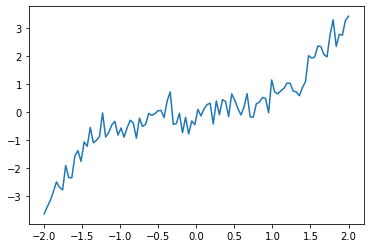

In [ ]:
def readCSV(file):
  """ Leer datos bidimensionales de un archivo .csv 

  Input: 
    file:   Nombre del archivo csv.
  Output:
    X: Primeras coordenadas de los datos.
    Y: Segundas coordenadas de los datos.
  """
  with open(file, newline='') as File:  
      reader = csv.reader(File)
      X = []
      Y = []
      for r in reader:
          X.append(float(r[0]))
          Y.append(float(r[1]))
          
  return X, Y

X, Y = readCSV("/content/drive/My Drive/datosT3.csv")
plt.plot(X, Y)
plt.show()

Claramente se puede apreciar el comportamiento de un polinomio de tercer grado. Por lo tanto, se decidió usar 4 adelines para realizar la interpolación.

In [ ]:
# Calculamos los datos de entrada de la red
X_train = np.array([np.array([x, x**2, x**3]) for x in X])
Y_train = np.array([np.array([y]) for y in Y])
W, ecm = adeline(X_train, Y_train, 0.005, 25, ecm_min=0.0555)
print("Pesos obtenidos: ")
print(W)

Epoca:  1 . Error cuadratico medio:  0.057443708220155036
Epoca:  2 . Error cuadratico medio:  0.05636294640548761
Epoca:  3 . Error cuadratico medio:  0.05623937378811626
Epoca:  4 . Error cuadratico medio:  0.055931595521225015
Epoca:  5 . Error cuadratico medio:  0.05585651949042691
Epoca:  6 . Error cuadratico medio:  0.055640162730141725
Epoca:  7 . Error cuadratico medio:  0.05578686362020477
Epoca:  8 . Error cuadratico medio:  0.055832568185548145
Epoca:  9 . Error cuadratico medio:  0.05561330046103342
Epoca:  10 . Error cuadratico medio:  0.056259960255698474
Epoca:  11 . Error cuadratico medio:  0.05585492228597763
Epoca:  12 . Error cuadratico medio:  0.056398178515416945
Epoca:  13 . Error cuadratico medio:  0.05665046377339276
Epoca:  14 . Error cuadratico medio:  0.05580053281271336
Epoca:  15 . Error cuadratico medio:  0.05831217323344076
Epoca:  16 . Error cuadratico medio:  0.05600821616632632
Epoca:  17 . Error cuadratico medio:  0.056449508904485385
Epoca:  18 . Err

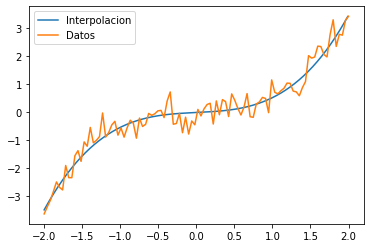

Polinomio aproximado: F(x) =  -0.0188  +  0.1282 x +  -0.0 x^2 + 0.4021 x^3
Error cuadratico medio:  0.056013206981256704


In [ ]:
# Ahora graficaremos la funcion polinomica obtenida de la red
# Definimos la funcion polinomica con los pesos W.
def f(x):
  return W[0][3] + W[0][0]*x + W[0][1]*x**2 + W[0][2]*x**3
x = [i/100 for i in range(-200, 200)]

plt.plot(x, [f(i) for i in x], label="Interpolacion")
plt.plot(X, Y, label="Datos")
plt.legend()
plt.show()

print("Polinomio aproximado: F(x) = ", round(W[0][3],4), " + ", 
      round(W[0][0],4),"x + ", 
      round(W[0][1],4), "x^2 +", 
      round(W[0][2],4), "x^3")
print("Error cuadratico medio: ", E(X_train, Y_train, W))

El número de épocas y la tasa de aprendizaje elegidas fueron $25$ y $0.005$ respectivamente, pues modificarlas no disminuia el error cuadrático medio mas bajo de 0.55.


## **Problema 4**

### **Problema 4.a**
Sean 
$$w = [\begin{array}{crl} w_1 & w_2 \end{array}]^t$$ 
$$ \mathcal{E}(w) = \frac{1}{2} \sigma^2 - r^t w + \frac{1}{2} w^t R w $$

Encuentre el valor óptimo de $w$, para el cual $\mathcal{E}(w)$ es mínimo.

$$ \mathcal{E}(w) = \frac{1}{2} \sigma^2 - r^t w + \frac{1}{2} w^t R w $$

$$ = \frac{1}{2} \sigma^2 - \left[ \begin{array}{crl} 0.8182 & 0.354 \\ \end{array} \right] \left[ \begin{array}{crl} w_1 \\ w_2 \\ \end{array} \right] + \frac{1}{2} [\begin{array}{crl} w_1 & w_2 \end{array}] \left[ \begin{array}{crl} 1 & 0.8182 \\ 0.8182 & 1 \\ \end{array} \right] \left[ \begin{array}{crl} w_1 \\ w_2 \\ \end{array} \right]$$

$$ = \frac{1}{2} \sigma^2 - 0.8182 w_1 - 0.354 w_2 + \frac{1}{2} [\begin{array}{crl} w_1 & w_2 \end{array}] \left[ \begin{array}{crl} w_1 + 0.8182w_2 \\ 0.8182w_1 + w_2 \\ \end{array} \right] $$

$$ = \frac{1}{2} \sigma^2 - 0.8182 w_1 - 0.354 w_2 + \frac{w_1^2}{2} + 0.8182w_1w_2 + \frac{w_2^2}{2}$$

$$ \mathcal{E}(w) = \frac{w_1^2}{2} - 0.8182 w_1 + 0.8182w_1w_2 - 0.354 w_2 + \frac{w_2^2}{2} + \frac{1}{2} \sigma^2$$
			
Calculamos las derivadas parciales de $\mathcal{E}(w)$ respecto a $w_1, w_2$ y las igualamos a 0.
$$ \frac{\partial \mathcal{E}(w)}{\partial w_1} = w_1 + 0.8182w_2 - 0.8182 = 0$$

$$w_1 = 0.8182(1 - w_2)$$

$$ \frac{\partial \mathcal{E}(w)}{\partial w_2} = w_2 + 0.8182w_1 - 0.354 = 0$$

$$w_1 = \frac{0.354 - w_2}{0.8182}$$
			
Igualando los $w_1$ obtenemos
$$ 0.8182(1 - w_2) = \frac{0.354 - w_2}{0.8182}$$
$$ 0.6694 - 0.6694w_2 + w_2 = 0.354$$
$$ 0.3306w_2 = -0.3154 $$
$$ w_2 = -0.954$$
$$ w_1 = 0.8182(1 - w_2) = 0.8182(1 + 0.954) = 1.5987$$
			
Sabemos que el punto $p=(1.5987, -0.954)$ es un punto crítico. Calculamos las segundas derivadas parciales de $\mathcal{E}(w)$.
$$ \frac{\partial \mathcal{E}(p)}{(\partial w_1)^2} = 1$$
$$ \frac{\partial \mathcal{E}(p)}{(\partial w_2)^2} = 1$$
$$ \frac{\partial \mathcal{E}(p)}{\partial w_1 \partial w_2} = 0.8182$$
$$ \frac{\partial \mathcal{E}(p)}{\partial w_2 \partial w_1} = 0.8182$$
			
Finalmente, como
$$ \frac{\partial \mathcal{E}(p)}{\partial w_1} = 0 $$
$$ \frac{\partial \mathcal{E}(p)}{\partial w_2} = 0 $$
$$ \frac{\partial \mathcal{E}(p)}{(\partial w_1)^2} > 0 $$
$$ \left| \begin{array}{crl} \frac{\partial \mathcal{E}(p)}{(\partial w_1)^2} & \frac{\partial \mathcal{E}(p)}{\partial w_1 \partial w_2} \\ \frac{\partial \mathcal{E}(p)}{\partial w_2 \partial w_1} & \frac{\partial \mathcal{E}(p)}{(\partial w_2)^2} \\ \end{array} \right| = \left| \begin{array}{crl} 1 & 0.8182 \\ 0.8182 & 1 \\ \end{array} \right| = 0.3305 > 0$$
		
Entonces por el criterio de la segunda derivada, el punto $p=(1.5987, -0.954)$ es un mínimo de $\mathcal{E}(w)$. Más aún, como sólo conseguimos un punto tal que las derivadas parciales de $\mathcal{E}$ evaluadas en ese punto son $0$, entonces $p$ es el único punto crítico de $\mathcal{E}$, y por lo tanto, es un mínimo global.

### **Problema 4.b**
Use el método del descenso de gradiente para calcular el valor óptimo, usando los valores de la tasa de aprendizaje y en cada caso grafique la trayectoria de la evolución de los pesos $w(n)$ en el plano.

In [ ]:
def E(W, s=1):
  """ Funcion de costo.
  
  Input:
    W = [x, y]  Pesos sinapticos.
    s:  Sigma. Valor predeterminado: 1.
  Output:
    x**2/2 - 0.8182*x + 0.8182xy - 0.354y + y**2/2 + s**2/2
  """
  return W[0]**2/2 - 0.8182*W[0] + 0.8182*W[0]*W[1] - 0.354*W[1] + W[1]**2/2 + s**2/2


def dE(W):
  """ Derivada de la funcion de costo.
  
  Input:
    W = [x, y]  Pesos sinapticos.
  Output:
    [x + 0.8182y - 0.8182,  y + 0.8182x - 0.354]
  """
  return np.array([W[0] + 0.8182*W[1] - 0.8182, W[1] + 0.8182*W[0] - 0.354])


def descent_gradient(k, n, E, dE, epochs, err_min=0, dif_err=0):
  """ Implementacion del descenso de gradiente.
  
  Input:
   - k:   Dimension de los pesos sinapticos.
   - n:   Tasa de aprendizaje
   - E:   Funcion de coste.
   - dE:  Derivada de la funcion de coste.
   - epochs:  Numero de epocas.
   - err_min:   Error necesario para finalizar el entrenamiento. 
                Valor predeterminado: 0.
   - dif_err:   Diferencia necesaria entre los errores de dos epocas para finalizar
                el entrenamiento. Valor predeterminao: 0

  Output:
   err:  Evaluacion de la funcion de coste en cada epoca.
   W:   Pesos sinapticos obtenidos en cada epoca.
  """

  # Inicializamos los pesos sinapticos.
  w_j = np.array([uniform(-0.05,0.05) for i in range(k)])
  # Error cometido en cada epoca.
  err = []
  # Pesos obtenidos en cada epoca.
  W = []
  # Epoca
  epoch = 0

  for j in range(epochs):
      epoch += 1
      # Actualizamos W.
      w_j -= n*dE(w_j)

      # Almacenamos las coordenadas de W para esta epoca.
      W.append(w_j.copy())

      # Calculamos el nuevo error y verificamos que haya cambiado.
      new_err = E(w_j) 
      err.append(new_err)
      print("Epoca: ", j+1, ". Error obtenido: ", new_err)
      
      if j > 0:
        if err[len(err)-2] - new_err <= dif_err or new_err <= err_min:
          break

  return err, W

Epoca:  1 . Error obtenido:  0.36431207257685316
Epoca:  2 . Error obtenido:  0.24876566769354425
Epoca:  3 . Error obtenido:  0.17141298366687113
Epoca:  4 . Error obtenido:  0.11962913342788656
Epoca:  5 . Error obtenido:  0.08496237067342421
Epoca:  6 . Error obtenido:  0.06175466336066321
Epoca:  7 . Error obtenido:  0.046218234922578594
Epoca:  8 . Error obtenido:  0.035817353639531535
Epoca:  9 . Error obtenido:  0.028854470767502693
Epoca:  10 . Error obtenido:  0.024193160194848906
Epoca:  11 . Error obtenido:  0.021072640051959912
Epoca:  12 . Error obtenido:  0.01898360397285831
Epoca:  13 . Error obtenido:  0.017585096179298598
Epoca:  14 . Error obtenido:  0.01664886340275079
Epoca:  15 . Error obtenido:  0.016022101209561768
Epoca:  16 . Error obtenido:  0.015602514482146779
Epoca:  17 . Error obtenido:  0.015321621627190918
Epoca:  18 . Error obtenido:  0.01513357755713407
Epoca:  19 . Error obtenido:  0.015007691221259334
Epoca:  20 . Error obtenido:  0.01492341645760919

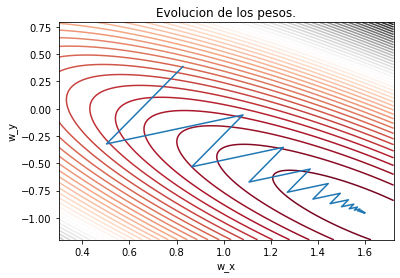

Pesos obtenidos:  [ 1.59846631 -0.95334834]


In [ ]:
err, W = descent_gradient(2, 1, E, dE, 300, dif_err = 1e-7)

# Graficamos las curvas de nivel
X = [i/140 + 0.3 for i in range(200)]
Y = [i/100 - 1.2 for i in range(200)]
Z = [[E( [X[i], Y[j]] ) for i in range(200)] for j in range(200)]
plt.contour(X, Y, Z, 45, cmap='RdGy')
# Graficamos los resultados.
X = [w[0] for w in W]
Y = [w[1] for w in W]
plt.plot(X, Y)
plt.xlabel("w_x")
plt.ylabel("w_y")
plt.title("Evolucion de los pesos.")
plt.show()
print("Pesos obtenidos: ", W[len(W)-1])

Epoca:  1 . Error obtenido:  0.3128107197689879
Epoca:  2 . Error obtenido:  0.25311619703470467
Epoca:  3 . Error obtenido:  0.2220253158478392
Epoca:  4 . Error obtenido:  0.19883441835380722
Epoca:  5 . Error obtenido:  0.17905481228615744
Epoca:  6 . Error obtenido:  0.16157033177665608
Epoca:  7 . Error obtenido:  0.14598162697422057
Epoca:  8 . Error obtenido:  0.1320553514556499
Epoca:  9 . Error obtenido:  0.11960846093906286
Epoca:  10 . Error obtenido:  0.10848261044443891
Epoca:  11 . Error obtenido:  0.09853734657599661
Epoca:  12 . Error obtenido:  0.08964734406917063
Epoca:  13 . Error obtenido:  0.08170062188735461
Epoca:  14 . Error obtenido:  0.07459709040122792
Epoca:  15 . Error obtenido:  0.0682472820171724
Epoca:  16 . Error obtenido:  0.06257122254580749
Epoca:  17 . Error obtenido:  0.05749742357498411
Epoca:  18 . Error obtenido:  0.05296198201581176
Epoca:  19 . Error obtenido:  0.04890777524508644
Epoca:  20 . Error obtenido:  0.045283741658473375
Epoca:  21 .

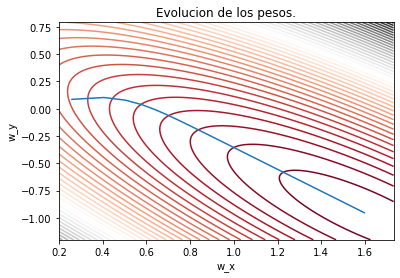

Pesos obtenidos:  [ 1.59692552 -0.95222196]


In [ ]:
err, W = descent_gradient(2, 0.3, E, dE, 300, dif_err = 1e-7)

# Graficamos las curvas de nivel
X = [i/130 + 0.2 for i in range(200)]
Y = [i/100 - 1.2 for i in range(200)]
Z = [[E( [X[i], Y[j]] ) for i in range(200)] for j in range(200)]
plt.contour(X, Y, Z, 45, cmap='RdGy')
# Graficamos los resultados.
X = [w[0] for w in W]
Y = [w[1] for w in W]
plt.plot(X, Y)
plt.xlabel("w_x")
plt.ylabel("w_y")
plt.title("Evolucion de los pesos.")
plt.show()
print("Pesos obtenidos: ", W[len(W)-1])

Se puede notar claramente la diferencia en la evolución de los pesos sinápticos para los distintos $\eta$, siendo más suave con $\eta=0.3$, aunque con $\eta=1$ logra converger más rápido. En ambos casos, los pesos obtenidos coinciden casi exáctamente con los predichos teóricamente $(1.5987, -0.954)$